## Tunability Importance of Hyperparameters of ML Algorithms

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, uniform, loguniform
import xgboost
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from skopt import BayesSearchCV
from skopt.space import Integer, Real

In [4]:
data_fitness = pd.read_csv("../data/fitness_dataset.csv")
data_heart = pd.read_csv("../data/heart.csv")
data_ecommerce = pd.read_csv("../data/ecommerce.csv")
data_placement = pd.read_csv("../data/placementdata.csv")
data_insurance = pd.read_csv("../data/TravelInsurancePrediction.csv")
data_churn = pd.read_csv("../data/Churn_Modelling.csv")


In [3]:
data_fitness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                2000 non-null   int64  
 1   height_cm          2000 non-null   int64  
 2   weight_kg          2000 non-null   int64  
 3   heart_rate         2000 non-null   float64
 4   blood_pressure     2000 non-null   float64
 5   sleep_hours        1840 non-null   float64
 6   nutrition_quality  2000 non-null   float64
 7   activity_index     2000 non-null   float64
 8   smokes             2000 non-null   object 
 9   gender             2000 non-null   object 
 10  is_fit             2000 non-null   int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 172.0+ KB


In [4]:
data_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
data_ecommerce.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
data_placement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [7]:
data_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [8]:
data_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
y_fitness = data_fitness.loc[:, 'is_fit']
X_fitness = data_fitness.drop(['is_fit'], axis = 1)
y_heart = data_heart.loc[:,'HeartDisease']
X_heart = data_heart.drop(['HeartDisease'], axis = 1)
y_ecommerce = data_ecommerce.loc[:,'Reached.on.Time_Y.N']
X_ecommerce = data_ecommerce.drop(['Reached.on.Time_Y.N'], axis = 1)
y_placement = data_placement.loc[:,'PlacementStatus']
X_placement = data_placement.drop(['PlacementStatus'], axis = 1)
y_insurance = data_insurance.loc[:,'TravelInsurance']
X_insurance = data_insurance.drop(['TravelInsurance'], axis = 1)
y_churn = data_churn.loc[:,'Exited']
X_churn = data_churn.drop(['Exited'], axis = 1)

In [6]:
X_fitness['smokes'] = X_fitness['smokes'].replace({'yes':1, 'no':0}).astype(int)

In [7]:
X_ecommerce = X_ecommerce.drop(['ID'], axis = 1)
X_ecommerce['Gender'] = X_ecommerce['Gender'].replace({'M':1, 'F':0}).astype(int)

C:\Users\zawol\AppData\Local\Temp\ipykernel_14284\2984316737.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_ecommerce['Gender'] = X_ecommerce['Gender'].replace({'M':1, 'F':0}).astype(int)


In [8]:
X_placement = X_placement.drop(['StudentID'], axis = 1)
X_placement['ExtracurricularActivities'] = X_placement['ExtracurricularActivities'].replace({'Yes':1, 'No':0}).astype(int)
X_placement['PlacementTraining'] = X_placement['PlacementTraining'].replace({'Yes':1, 'No':0}).astype(int)
y_placement = y_placement.replace({'Placed':1, 'NotPlaced':0}).astype(int)

C:\Users\zawol\AppData\Local\Temp\ipykernel_14284\1500601370.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_placement['ExtracurricularActivities'] = X_placement['ExtracurricularActivities'].replace({'Yes':1, 'No':0}).astype(int)
C:\Users\zawol\AppData\Local\Temp\ipykernel_14284\1500601370.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_placement['PlacementTraining'] = X_placement['PlacementTraining'].replace({'Yes':1, 'No':0}).astype(int)
C:\Users\zawol\AppData\Local\Temp\ipykernel_14284\1500601370.py:4: FutureWarning

In [9]:
X_insurance = X_insurance.drop(['Unnamed: 0'], axis = 1)
X_insurance['GraduateOrNot'] = X_insurance['GraduateOrNot'].replace({'Yes':1, 'No':0}).astype(int)
X_insurance['FrequentFlyer'] = X_insurance['FrequentFlyer'].replace({'Yes':1, 'No':0}).astype(int)
X_insurance['EverTravelledAbroad'] = X_insurance['EverTravelledAbroad'].replace({'Yes':1, 'No':0}).astype(int)


C:\Users\zawol\AppData\Local\Temp\ipykernel_14284\1569246524.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_insurance['GraduateOrNot'] = X_insurance['GraduateOrNot'].replace({'Yes':1, 'No':0}).astype(int)
C:\Users\zawol\AppData\Local\Temp\ipykernel_14284\1569246524.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_insurance['FrequentFlyer'] = X_insurance['FrequentFlyer'].replace({'Yes':1, 'No':0}).astype(int)
C:\Users\zawol\AppData\Local\Temp\ipykernel_14284\1569246524.py:4: FutureWarning: Downcasting behavior in `repla

In [10]:
X_churn = X_churn.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
X_churn['Gender'] = X_churn['Gender'].replace({'Female':1, 'Male':0}).astype(int)

C:\Users\zawol\AppData\Local\Temp\ipykernel_14284\3355471563.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_churn['Gender'] = X_churn['Gender'].replace({'Female':1, 'Male':0}).astype(int)


In [11]:
cat_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='ignore'))
])

In [12]:
num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer()),
    ('scale', MinMaxScaler())
])

In [13]:
col_transformer = ColumnTransformer(transformers=[
    ('num-pipeline',num_pipeline, make_column_selector(dtype_include=np.number)),
    ('cat-pipeline',cat_pipeline, make_column_selector(dtype_include=np.object_))
])

In [14]:
model_pipeline = Pipeline(steps=[
    ('preprocessing', col_transformer),
    ('model', RandomForestClassifier())
])

In [19]:
cross_validate(model_pipeline, X_heart, y_heart)

{'fit_time': array([0.12432837, 0.13918066, 0.11912322, 0.12204933, 0.11774635]),
 'score_time': array([0.00999713, 0.01099968, 0.00900006, 0.00933337, 0.00930619]),
 'test_score': array([0.9076087 , 0.80434783, 0.8423913 , 0.84153005, 0.75409836])}

In [20]:
cross_validate(model_pipeline, X_fitness, y_fitness)

{'fit_time': array([0.25809836, 0.24707341, 0.24761009, 0.25132942, 0.26123953]),
 'score_time': array([0.01100922, 0.01100016, 0.01049495, 0.01307535, 0.01100206]),
 'test_score': array([0.7875, 0.7625, 0.745 , 0.77  , 0.805 ])}

In [21]:
cross_validate(model_pipeline, X_ecommerce, y_ecommerce)

{'fit_time': array([0.76523447, 0.77262115, 0.71175146, 0.66416574, 0.64625573]),
 'score_time': array([0.03007984, 0.02700424, 0.03176832, 0.03551412, 0.03403711]),
 'test_score': array([0.78863636, 0.79545455, 0.58409091, 0.42227273, 0.42246476])}

In [22]:
cross_validate(model_pipeline, X_placement, y_placement)

{'fit_time': array([0.59033275, 0.57705641, 0.53832698, 0.55158973, 0.53842044]),
 'score_time': array([0.02800417, 0.02799869, 0.02847815, 0.02899313, 0.02996755]),
 'test_score': array([0.787 , 0.7825, 0.7985, 0.7855, 0.7935])}

In [23]:
cross_validate(model_pipeline, X_insurance, y_insurance)

{'fit_time': array([0.15043259, 0.14579439, 0.14225292, 0.14661241, 0.14469767]),
 'score_time': array([0.01107907, 0.0109992 , 0.01008081, 0.01150966, 0.01000357]),
 'test_score': array([0.77889447, 0.81658291, 0.80352645, 0.77581864, 0.77581864])}

In [24]:
cross_validate(model_pipeline, X_churn, y_churn)

{'fit_time': array([0.69758725, 0.70980334, 0.70109606, 0.78521681, 0.73652768]),
 'score_time': array([0.02843714, 0.02790999, 0.02746415, 0.02902031, 0.02799892]),
 'test_score': array([0.865 , 0.869 , 0.857 , 0.865 , 0.8545])}

In [59]:
X = [X_fitness, X_heart, X_placement, X_insurance, X_churn]
y = [y_fitness, y_heart, y_placement, y_insurance, y_churn]

In [15]:
def roc_auc_difference(param_cols, results, results_mean):
    best_params = results_mean.iloc[0][param_cols]
    mask_best = (results[param_cols] == best_params.values).all(axis=1)
    best_rows = results[mask_best].copy()
    merged = results.merge(
        best_rows[['dataset', 'mean_test_score']],
        on='dataset',
        suffixes=('', '_best')
    )
    merged['score_diff'] = merged['mean_test_score_best'] - merged['mean_test_score']
    return merged

In [16]:
def plot_roc_auc_difference(merged):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=merged, x='dataset', y='score_diff', color='lightblue')

    plt.title('ROC AUC difference')
    plt.xlabel('Dataset')
    plt.ylabel('Difference')
    plt.tight_layout()
    plt.show()

In [43]:
def plot_iteration_scores(results):
    results = results.copy()
    results['iteration'] = results.groupby('dataset').cumcount() + 1
    results['cummax'] = results.groupby('dataset')['mean_test_score'].cummax()
    
    plt.figure(figsize=(8, 6))
    
    for dataset, df_sub in results.groupby('dataset'):
        plt.plot(df_sub['iteration'], df_sub['cummax'], label=dataset, linewidth=2)
    
    plt.title('Best score for the iteration')
    plt.xlabel('Iteration')
    plt.ylabel('Cummulative ROC AUC')
    plt.legend(title='Dataset', loc='center left', bbox_to_anchor=(1.02, 0.5))
    
    plt.xlim(left=1, right=results['iteration'].max())
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [40]:
param_dtc = {
    "model__max_depth": randint(1, 30),
    "model__min_samples_split": randint(2, 20),
    "model__min_samples_leaf": randint(1, 10),
    "model__max_features": uniform(0.1, 0.9),
}

param_rf = {
    "model__n_estimators": randint(100, 2000),
    "model__max_depth": randint(5, 30),
    "model__min_samples_leaf": randint(1, 10),
    "model__max_features": uniform(0.1, 0.9),
}

param_xgb = {
    "model__n_estimators": randint(100, 5000),
    "model__learning_rate": uniform(0.01, 0.3),
    "model__max_depth": randint(1, 15),
    "model__subsample": uniform(0.1, 0.9),
}

# Decision Tree

In [ ]:
results_list = []

model_pipeline.set_params(model=DecisionTreeClassifier())

for i, (Xi, yi) in enumerate(zip(X, y)):
    search = RandomizedSearchCV(
        model_pipeline,
        param_distributions=param_dtc,
        n_iter=50,
        scoring='roc_auc',
        cv=5,
        random_state=123,
        n_jobs=-1
    )

    search.fit(Xi, yi)

    df = pd.DataFrame(search.cv_results_)
    df['dataset'] = i
    results_list.append(df)

results_dtc = pd.concat(results_list, ignore_index=True)

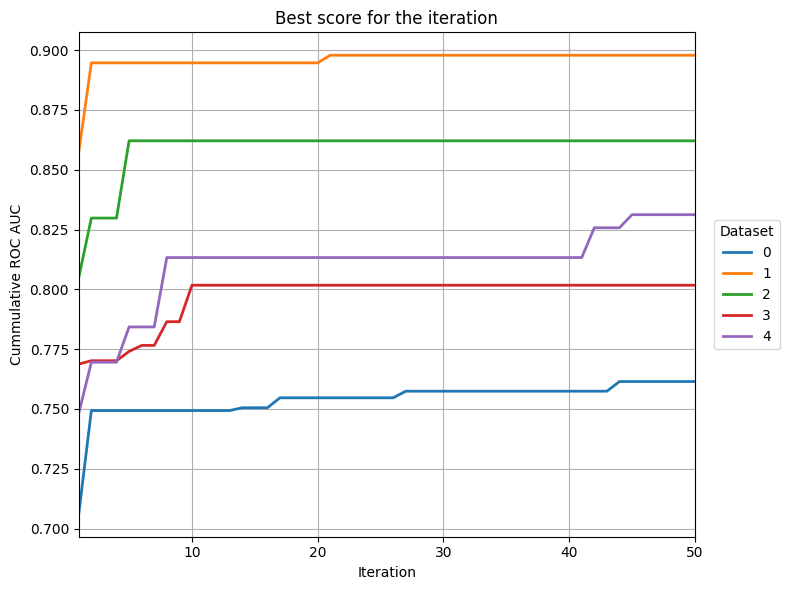

In [49]:
plot_iteration_scores(results_dtc)

In [40]:
param_cols_dtc = [c for c in results_dtc.columns if c.startswith('param_')]
results_mean_dtc = results_dtc.groupby(param_cols_dtc)['mean_test_score'].mean().reset_index().sort_values('mean_test_score', ascending=False).reset_index(drop=True)
results_mean_dtc.head()

,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__min_samples_split,mean_test_score
0,6,0.993352,6,19,0.823332
1,27,0.539357,9,2,0.817290
2,6,0.835601,3,7,0.816211
3,5,0.443361,4,4,0.815510
4,12,0.607923,9,13,0.812867


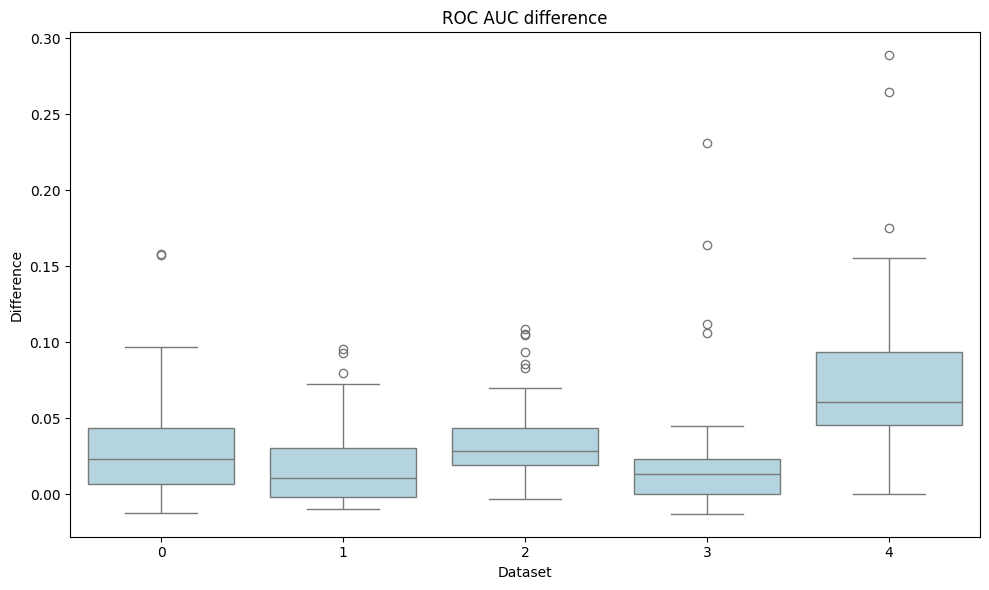

In [41]:
results_merged_dtc = roc_auc_difference(param_cols_dtc, results_dtc, results_mean_dtc)
plot_roc_auc_difference(results_merged_dtc)

# Random Forest

In [ ]:
results_list = []

model_pipeline.set_params(model=RandomForestClassifier())

for i, (Xi, yi) in enumerate(zip(X, y)):
    search = RandomizedSearchCV(
        model_pipeline,
        param_distributions=param_rf,
        n_iter=20,
        scoring='roc_auc',
        cv=5,
        random_state=123,
        n_jobs=-1
    )

    search.fit(Xi, yi)

    df = pd.DataFrame(search.cv_results_)
    df['dataset'] = i
    results_list.append(df)

results_rf = pd.concat(results_list, ignore_index=True)

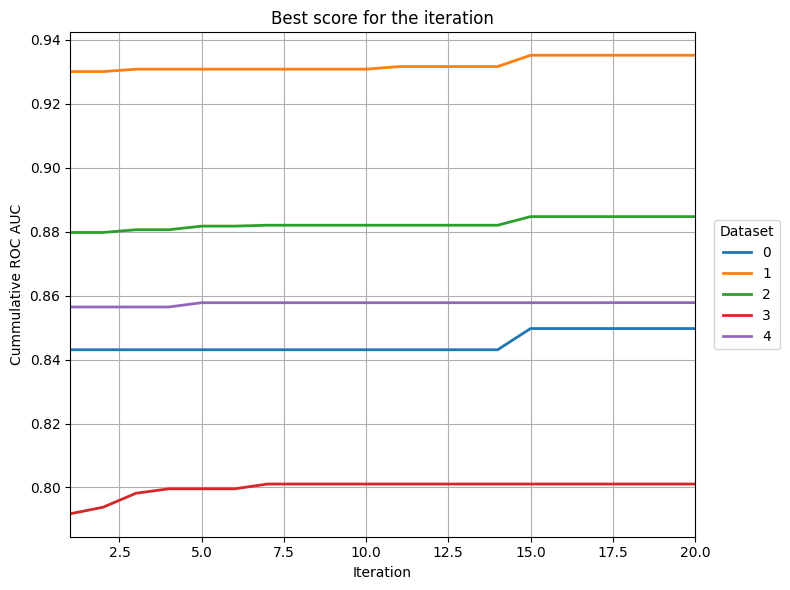

In [30]:
plot_iteration_scores(results_rf)

In [50]:
param_cols_rf = [c for c in results_rf.columns if c.startswith('param_')]
results_mean_rf = results_rf.groupby(param_cols_rf)['mean_test_score'].mean().reset_index().sort_values('mean_test_score', ascending=False).reset_index(drop=True)
results_mean_rf.head()

,param_model__max_depth,param_model__max_features,param_model__min_samples_leaf,param_model__n_estimators,mean_test_score
0,12,0.198036,6,795,0.863403
1,7,0.578645,9,1300,0.861791
2,26,0.408487,9,442,0.861752
3,9,0.458240,5,1941,0.861351
4,23,0.381035,5,1706,0.860992


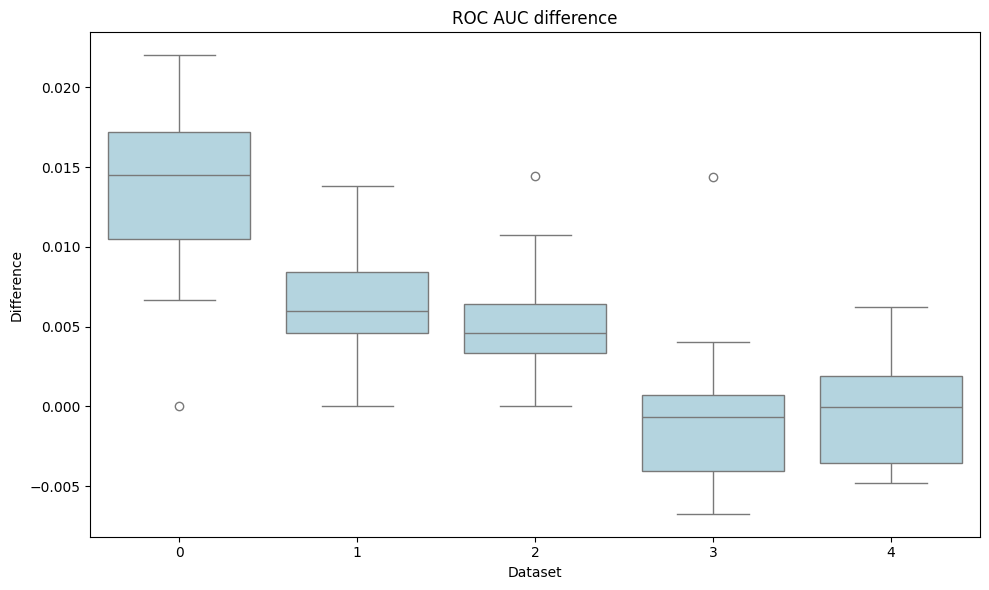

In [51]:
results_merged_rf = roc_auc_difference(param_cols_rf, results_rf, results_mean_rf)
plot_roc_auc_difference(results_merged_rf)

# XGBoost

In [ ]:
results_list = []

model_pipeline.set_params(model=XGBClassifier())

for i, (Xi, yi) in enumerate(zip(X, y)):
    search = RandomizedSearchCV(
        model_pipeline,
        param_distributions=param_xgb,
        n_iter=30,
        scoring='roc_auc',
        cv=5,
        random_state=123,
        n_jobs=-1
    )

    search.fit(Xi, yi)

    df = pd.DataFrame(search.cv_results_)
    df['dataset'] = i
    results_list.append(df)

results_xgb = pd.concat(results_list, ignore_index=True)

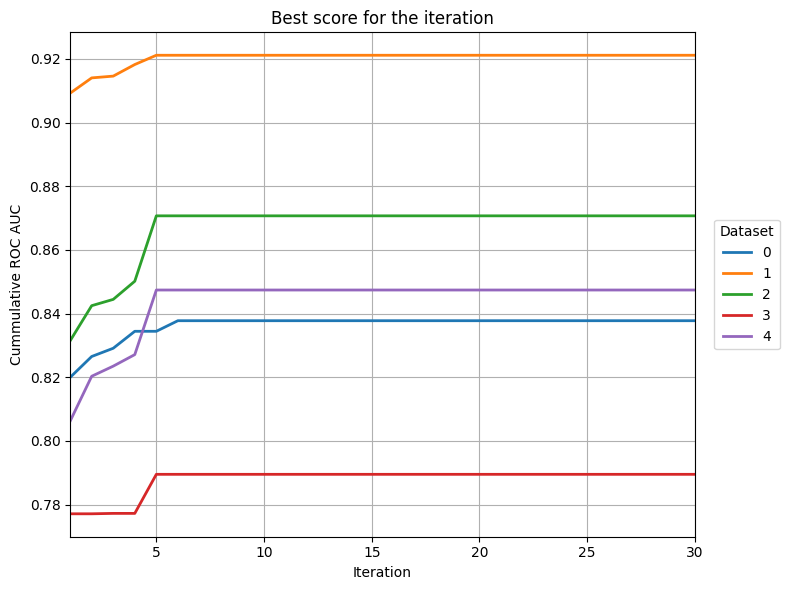

In [46]:
plot_iteration_scores(results_xgb)

In [47]:
param_cols_xgb = [c for c in results_xgb.columns if c.startswith('param_')]
results_mean_xgb = results_xgb.groupby(param_cols_xgb)['mean_test_score'].mean().reset_index().sort_values('mean_test_score', ascending=False).reset_index(drop=True)
results_mean_xgb.head()

,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,mean_test_score
0,0.142077,5,139,0.741097,0.851732
1,0.079390,4,919,0.734463,0.846670
2,0.038714,11,967,0.927151,0.844744
3,0.107245,14,1192,0.668613,0.840957
4,0.138359,14,1259,0.752010,0.840467


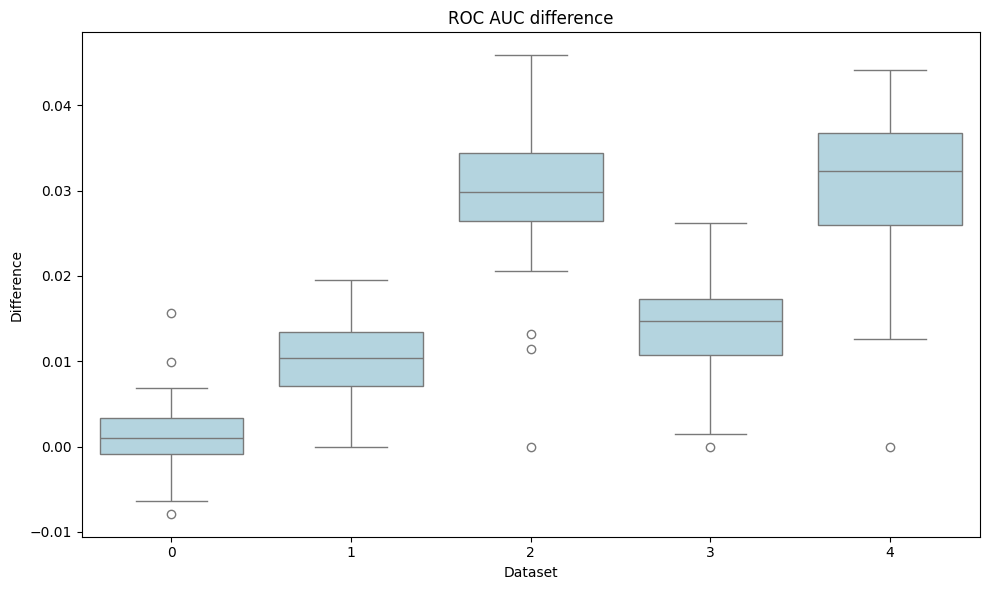

In [48]:
results_merged_xgb = roc_auc_difference(param_cols_xgb, results_xgb, results_mean_xgb)
plot_roc_auc_difference(results_merged_xgb)

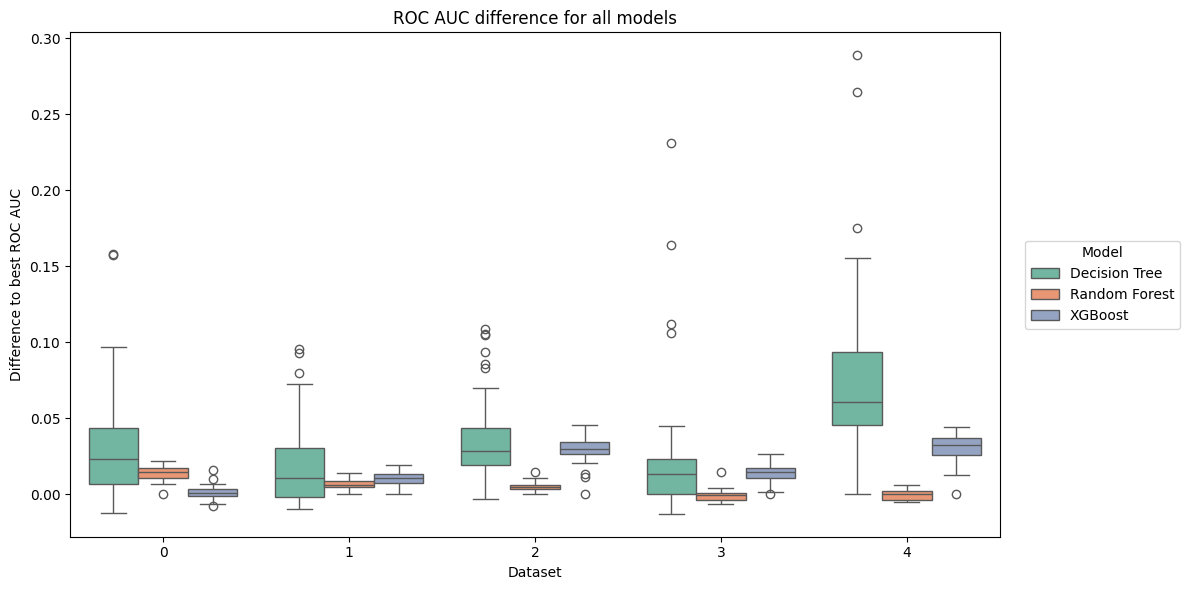

In [ ]:
results_merged_dtc = roc_auc_difference(param_cols_dtc, results_dtc, results_mean_dtc)
results_merged_rf = roc_auc_difference(param_cols_rf, results_rf, results_mean_rf)
results_merged_xgb = roc_auc_difference(param_cols_xgb, results_xgb, results_mean_xgb)

results_merged_dtc['model'] = 'Decision Tree'
results_merged_rf['model'] = 'Random Forest'
results_merged_xgb['model'] = 'XGBoost'

results_all = pd.concat([results_merged_dtc, results_merged_rf, results_merged_xgb], ignore_index=True)

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=results_all,
    x='dataset',
    y='score_diff',
    hue='model',
    palette='Set2'
)

plt.title('ROC AUC tunability for all models')
plt.xlabel('Dataset')
plt.ylabel('ROC AUC tuanbility')
plt.legend(title='Model', loc='center left', bbox_to_anchor=(1.02, 0.5))
plt.tight_layout()
plt.show()

In [54]:
param_bayes_dtc = {
    "model__max_depth": Integer(1, 30),
    "model__min_samples_split": Integer(2, 20),
    "model__min_samples_leaf": Integer(1, 10),
    "model__max_features": Real(0.1, 0.9)
}

param_bayes_rf = {
    "model__n_estimators": Integer(100, 2000),
    "model__max_depth": Integer(5, 30),
    "model__min_samples_leaf": Integer(1, 10),
    "model__max_features": Real(0.1, 0.9)
}

param_bayes_xgb = {
    "model__n_estimators": Integer(100, 5000),
    "model__learning_rate": Real(0.01, 0.3),
    "model__max_depth": Integer(1, 15),
    "model__subsample": Real(0.1, 0.9)
}

In [56]:
def run_bayes_search(X, y, name, model, param_space):
    model_pipeline.set_params(model=model)
    
    opt = BayesSearchCV(
        model_pipeline,
        search_spaces=param_space,
        n_iter=30,
        cv=5,
        scoring='roc_auc',
        n_jobs=-1,
        random_state=42
    )
    
    opt.fit(X, y)

    res = opt.optimizer_results_[0]
    params = res.x_iters
    scores = res.func_vals
    param_names = [dim.name for dim in res.space.dimensions]
    
    df = pd.DataFrame(params, columns=param_names)
    df['mean_test_score'] = -scores
    df['dataset'] = name
    return df


In [58]:
results_all_dtc = []

for i, (Xi, yi) in enumerate(zip(X, y)):
    name = i
    df_result = run_bayes_search(Xi, yi, name, DecisionTreeClassifier(random_state=42), param_bayes_dtc)
    results_all_dtc.append(df_result)

results_bayes_dtc = pd.concat(results_all_dtc, ignore_index=True)

TypeError: 'int' object is not iterable

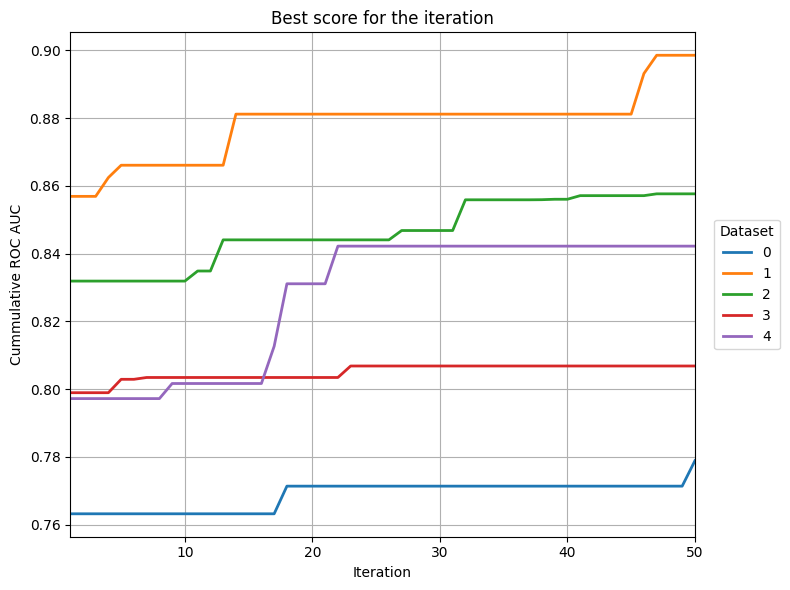

In [ ]:
plot_iteration_scores(results_bayes_dtc)

In [ ]:
results_all_rf = []

for i, (Xi, yi) in enumerate(zip(X, y)):
    name = i
    df_result = run_bayes_search(X, y, name, RandomForestClassifier(random_state=42), param_bayes_rf)
    results_all_rf.append(df_result)

results_bayes_rf = pd.concat(results_all_rf, ignore_index=True)

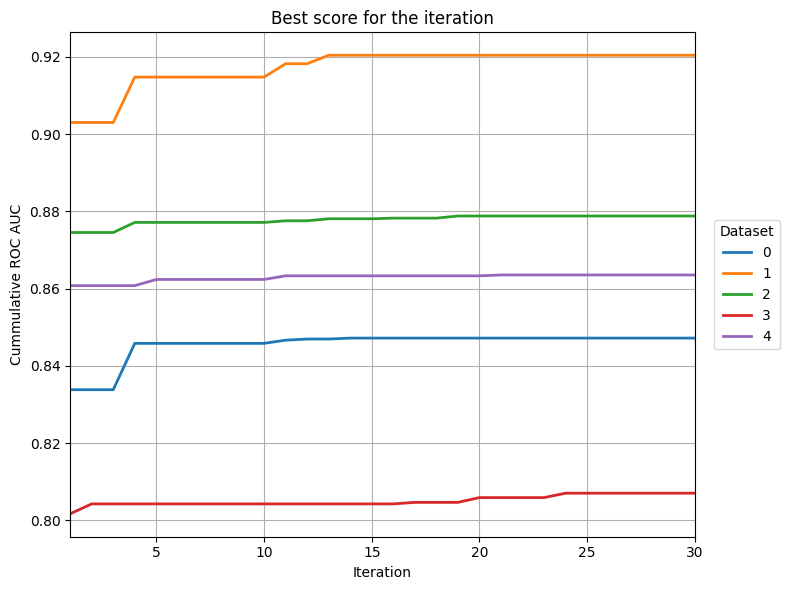

In [61]:
plot_iteration_scores(results_bayes_rf)

In [ ]:
results_all_xgb = []

for i, (Xi, yi) in enumerate(zip(X, y)):
    name = i
    df_result = run_bayes_search(Xi, yi, name, XGBClassifier(random_state=42), param_bayes_xgb)
    results_all_xgb.append(df_result)

results_bayes_xgb = pd.concat(results_all_xgb, ignore_index=True)

In [ ]:
plot_iteration_scores(results_bayes_xgb)

TODO: policzyć różnicę najlepszych wyników z RandomSearcha (dla każdego datasetu albo łącznie) i najlepszego wyniku z Bayesa oraz różnicę z defaulta i Bayesa